In [1]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import platemotion
from platemotion import Plate
pkg_dir = os.path.dirname(platemotion.__file__)


matplotlib.rcParams.update({'font.size': 12})

In [2]:
# define a tectonic plate from a spherical polygon file

plate_an = Plate.from_file(f'{pkg_dir}/data/NnrMRVL_PltBndsLatLon/an',skiprows=1)

In [3]:
# set Euler pole

from astropy import units as u

#omega = np.array([-0.0914,-0.5283,0.7547])*u.mas/u.yr
#plate_an.set_omega(omega,'cartesian')

omega = [59.4*u.deg, 236.5*u.deg, 0.23*u.deg/u.Ma]
plate_an.set_omega(omega,'spherical')
plate_an.set_name('Antarctica')

In [4]:
plate_an.info

{'polygon': instance of class Sphericalpolygon,
 'area': <Quantity 58149691.98644825 km2>,
 'perimeter': <Quantity 40281.71000021 km>,
 'compactness': 0.3990000689087545,
 'centroid': (<Quantity -83.61081032 deg>,
  <Quantity 57.80052887 deg>,
  <Quantity 880.96785844 km>),
 'inertia': <Quantity [ 6.77582676e+29,  5.99961382e+29,  1.85826885e+29,
            -2.60236951e+28,  2.67935794e+28,  4.15067565e+28] kg km2>,
 'inertia_tensor': <Quantity [[ 6.77582676e+29, -2.60236951e+28,  2.67935794e+28],
            [-2.60236951e+28,  5.99961382e+29,  4.15067565e+28],
            [ 2.67935794e+28,  4.15067565e+28,  1.85826885e+29]] kg km2>,
 'inertia_mag': <Quantity 9.27275284e+29 kg km2>,
 'thickness': <Quantity 100. km>,
 'density': <Quantity 3.1 g / cm3>,
 'omega_cartesian': <Quantity [-0.06462052, -0.09763096,  0.19797067] deg / Ma>,
 'omega_spherical': (<Latitude 59.4 deg>,
  <Longitude 236.5 deg>,
  <Quantity 0.23 deg / Ma>),
 'H_cartesian': <Quantity [-6.27283273e+26, -8.49556792e+26,

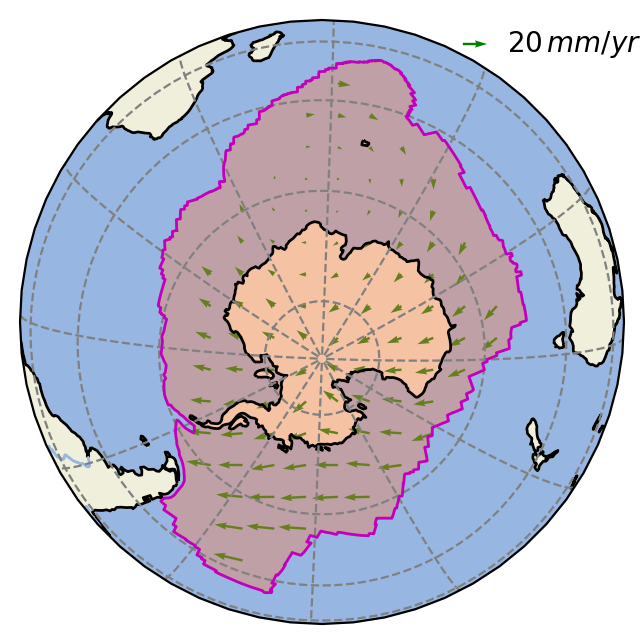

In [5]:
plate_an.plot()

In [6]:
location = [-65*u.deg, 45*u.deg, 0*u.m]
v = plate_an.velocity_at(location,'geodetic')
v.info

{'xyz': <Quantity [3.20709908, 0.11015245, 1.10116668] mm / yr>,
 'en': <Quantity [-2.18987197,  2.59126358] mm / yr>,
 'speed': <Quantity 3.39266653 mm / yr>,
 'azimuth': <Quantity -40.20108951 deg>}

In [8]:
from platemotion import PlateMotion

nnr_model = PlateMotion.loadmodel('NNR-MORVEL56') # GSRMv2.1
nnr_model_summmary = nnr_model.summary

Loading plates from NNR-MORVEL56: 100%|##########| 56/56 [02:22<00:00,  2.55s/it]


In [16]:
nnr_model.eu.info

{'polygon': instance of class Sphericalpolygon,
 'area': <Quantity 48557852.56060158 km2>,
 'perimeter': <Quantity 41567.7484449 km>,
 'compactness': 0.31952820926908415,
 'centroid': (<Quantity 59.0495698 deg>,
  <Quantity 58.29843896 deg>,
  <Quantity 789.50236941 km>),
 'inertia': <Quantity [ 5.13749781e+29,  4.56997717e+29,  2.51239207e+29,
            -1.81609024e+28, -1.08898600e+29, -1.58460561e+29] kg km2>,
 'inertia_tensor': <Quantity [[ 5.13749781e+29, -1.81609024e+28, -1.08898600e+29],
            [-1.81609024e+28,  4.56997717e+29, -1.58460561e+29],
            [-1.08898600e+29, -1.58460561e+29,  2.51239207e+29]] kg km2>,
 'inertia_mag': <Quantity 7.81347449e+29 kg km2>,
 'thickness': <Quantity 100. km>,
 'density': <Quantity 3.1 g / cm3>,
 'omega_cartesian': <Quantity [-0.04167677, -0.14069843,  0.16791664] deg / Ma>,
 'omega_spherical': (<Latitude 48.85 deg>,
  <Longitude 253.5 deg>,
  <Quantity 0.223 deg / Ma>),
 'H_cartesian': <Quantity [-6.48252109e+26, -1.57341672e+27,

In [17]:
from platemotion import ITRF_PlateMotion

# use NNR-MORVEL56 plate boundaries
platemodel = ITRF_PlateMotion('NNR-MORVEL56')

Unzip /home/ykliu/src/platemotion-data/ITRF2014-IGS-TRF.SNX.gz ... Finished.


Extracting block SITE/ID from ITRF2014-IGS-TRF.SNX ... Finished.
Extracting block SOLUTION/EPOCHS from ITRF2014-IGS-TRF.SNX ... Finished.
Extracting block SOLUTION/ESTIMATE from ITRF2014-IGS-TRF.SNX ... Finished.
Extracting block SITE/ID from ITRF2014-psd-gnss.snx ... Finished.


Unzip /home/ykliu/src/platemotion-data/GSRM_gridded_strain_v2.1.zip ... 

BadZipFile: File is not a zip file